In [1]:
import os
import imgaug
from skimage import io, transform
from skimage import img_as_ubyte
from imgaug import augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
import random

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In C:\Users\Flayiva_01\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Flayiva_01\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Flayiva_01\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
%matplotlib inline

In [3]:
# images = np.random.randint(0, 255, (16, 128, 128, 3), dtype=np.uint8)
SAMPLE_PATH = "data/Test/image/001.bmp"
TXT_PATH = "data/Test/AnnotationsByMD/001.txt"

In [4]:
img = img_as_ubyte(io.imread(SAMPLE_PATH, as_gray=True))
img.shape

(2400, 1935)

In [5]:
x,y = img.shape

In [6]:
SCALE = 15

In [7]:
img_dimmed = np.expand_dims(img, axis=0)

In [8]:
img_dimmed

array([[[252, 252, 253, ..., 253, 253,   0],
        [252, 252, 252, ..., 253, 253,   0],
        [252, 252, 252, ..., 253, 253,   0],
        ...,
        [252, 252, 252, ..., 134, 148,   0],
        [254, 254, 254, ..., 140, 136,  10],
        [  0,   0,   0, ...,   3,   1,   0]]], dtype=uint8)

In [9]:
def extract_labels_from_txt(path):
    with open(path, "r") as f:
        # only first 19 are actual coords in dataset label files
        coords_raw = f.readlines()[:19]
        coords_raw = [tuple([int(float(s)) for s in t.split(",")]) for t in coords_raw]
        return coords_raw

In [10]:
coords_raw = extract_labels_from_txt(TXT_PATH)

In [11]:
coords_raw

[(835, 996),
 (1473, 1029),
 (1289, 1279),
 (604, 1228),
 (1375, 1654),
 (1386, 2019),
 (1333, 2200),
 (1263, 2272),
 (1305, 2252),
 (694, 1805),
 (1460, 1870),
 (1450, 1864),
 (1588, 1753),
 (1569, 2013),
 (1514, 1620),
 (1382, 2310),
 (944, 1506),
 (1436, 1569),
 (664, 1340)]

In [12]:
kp_to_list = lambda k_arr: [(p.x, p.y) for p in k_arr]

In [13]:
def list_to_kp(coords_raw):
    kp = []
    for coord in coords_raw:
        kp.append(imgaug.Keypoint(x=coord[0], y=coord[1]))
    keypoints = imgaug.KeypointsOnImage(kp, shape=img.shape)
    return keypoints

In [14]:
keypoints_on_images = [list_to_kp(coords_raw)]

In [15]:
keypoints_on_images

[KeypointsOnImage([Keypoint(x=835.00000000, y=996.00000000), Keypoint(x=1473.00000000, y=1029.00000000), Keypoint(x=1289.00000000, y=1279.00000000), Keypoint(x=604.00000000, y=1228.00000000), Keypoint(x=1375.00000000, y=1654.00000000), Keypoint(x=1386.00000000, y=2019.00000000), Keypoint(x=1333.00000000, y=2200.00000000), Keypoint(x=1263.00000000, y=2272.00000000), Keypoint(x=1305.00000000, y=2252.00000000), Keypoint(x=694.00000000, y=1805.00000000), Keypoint(x=1460.00000000, y=1870.00000000), Keypoint(x=1450.00000000, y=1864.00000000), Keypoint(x=1588.00000000, y=1753.00000000), Keypoint(x=1569.00000000, y=2013.00000000), Keypoint(x=1514.00000000, y=1620.00000000), Keypoint(x=1382.00000000, y=2310.00000000), Keypoint(x=944.00000000, y=1506.00000000), Keypoint(x=1436.00000000, y=1569.00000000), Keypoint(x=664.00000000, y=1340.00000000)], shape=(2400, 1935))]

In [16]:
rs = iaa.Sequential()
rs_det = rs.to_deterministic()
seq = iaa.Sequential([iaa.Affine(translate_px={"x": (200, 200)})])
seq_det = seq.to_deterministic() # call this for each batch again, NOT only once at the start

In [17]:
images_rs = rs_det.augment_images(img_dimmed)
keypoints_rs = rs_det.augment_keypoints(keypoints_on_images)
images_aug = seq_det.augment_images(images_rs)
keypoints_aug = seq_det.augment_keypoints(keypoints_rs)

In [18]:
keypoints_aug

[KeypointsOnImage([Keypoint(x=1035.00000000, y=996.00000000), Keypoint(x=1673.00000000, y=1029.00000000), Keypoint(x=1489.00000000, y=1279.00000000), Keypoint(x=804.00000000, y=1228.00000000), Keypoint(x=1575.00000000, y=1654.00000000), Keypoint(x=1586.00000000, y=2019.00000000), Keypoint(x=1533.00000000, y=2200.00000000), Keypoint(x=1463.00000000, y=2272.00000000), Keypoint(x=1505.00000000, y=2252.00000000), Keypoint(x=894.00000000, y=1805.00000000), Keypoint(x=1660.00000000, y=1870.00000000), Keypoint(x=1650.00000000, y=1864.00000000), Keypoint(x=1788.00000000, y=1753.00000000), Keypoint(x=1769.00000000, y=2013.00000000), Keypoint(x=1714.00000000, y=1620.00000000), Keypoint(x=1582.00000000, y=2310.00000000), Keypoint(x=1144.00000000, y=1506.00000000), Keypoint(x=1636.00000000, y=1569.00000000), Keypoint(x=864.00000000, y=1340.00000000)], shape=(2400, 1935))]

[(1035.0, 996.0), (1673.0, 1029.0), (1489.0, 1279.0), (804.0, 1228.0), (1575.0, 1654.0), (1586.0, 2019.0), (1533.0, 2200.0), (1463.0, 2272.0), (1505.0, 2252.0), (894.0, 1805.0), (1660.0, 1870.0), (1650.0, 1864.0), (1788.0, 1753.0), (1769.0, 2013.0), (1714.0, 1620.0), (1582.0, 2310.0), (1144.0, 1506.0), (1636.0, 1569.0), (864.0, 1340.0)]


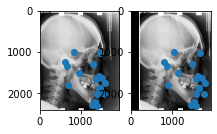

In [19]:
fig = plt.figure()

plt.rcParams["figure.figsize"] = [16,9]
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 1, 1)

ax1.imshow(images_rs[0], cmap="gray")
ax2.imshow(images_aug[0], cmap="gray")

k_orig = kp_to_list(keypoints_rs[0].keypoints)
k_aug = kp_to_list(keypoints_aug[0].keypoints)
print(k_aug)
ax1.scatter(*zip(*k_orig))
ax2.scatter(*zip(*k_aug))
plt.show()

In [20]:
ORIG_IMAGE_X = 1935
ORIG_IMAGE_Y = 2400
PIXELS_PER_MM = 10
N_LANDMARKS = 19

# (2400, 1935)

## Let's see how we can generate rotated images and save them with their corresponding annotations

In [38]:
BASE_PATH = "data/RawImage/TrainingData"
BASE_LABELS = "data/AnnotationsByMD/400_senior"

In [39]:
BASE_PATH2 = "data/images/1px_3px/128/train"
BASE_LABELS2 = "data/AnnotationsByMD/400_senior"

In [40]:
TEST_BASE_PATH = "data/Test/image"
TEST_BASE_LABELS = "data/Test/AnnotationsByMD"

In [41]:
def img_path_walker(base_path):
    # walk through subdirs to get all image paths
    img_paths = []
    for root, _, files in os.walk(base_path):
        for name in files:
            if name.endswith(".bmp"):
                img_paths.append(os.path.abspath(os.path.join(root, name)))
    return img_paths

In [42]:
def label_walker(base_labels):
    img_labels = {}
    for label_file in os.listdir(base_labels):
        linked_img = label_file[:-3] + "bmp"
        img_labels[linked_img] = extract_labels_from_txt(base_labels + "/" + label_file)
    return img_labels

In [43]:
img_labels = label_walker(BASE_LABELS2)
img_paths = img_path_walker(BASE_PATH2)

In [44]:
len(img_labels)

400

In [45]:
len(img_paths)

150

In [110]:

# shrink = iaa.Sequential(iaa.AdditiveGaussianNoise(scale=(30, 90)))
# augment_functions = [iaa.Fliplr(1.0)]


# augment_functions += [iaa.Affine(rotate=rot_angle) for rot_angle in [180]]

# print(augment_functions)

In [111]:
# shrink = iaa.Sequential([iaa.Scale({"height":256, "width":256})])
# shrink  = iaa.AdditiveGaussianNoise(scale=(30, 90))

# shrink = iaa.Sequential(iaa.AdditiveGaussianNoise(scale=(30, 90)))
# augment_functions = [iaa.Fliplr(1.0)]


# augment_functions += [iaa.Affine(rotate=rot_angle) for rot_angle in [90,180]]
# augment_functions += [iaa.Affine(rotate=90)]
# print(augment_functions)

In [46]:
# shrink = iaa.Scale({"height":224, "width":224})

# Papper and Salt
# augment_functions = [iaa.SaltAndPepper(0.1)]

# 1px
augment_functions = [iaa.Affine(translate_px={"y": (1)})]
augment_functions += [iaa.Affine(translate_px={"y": (-1)})]
augment_functions += [iaa.Affine(translate_px={"x": (1)})]
augment_functions += [iaa.Affine(translate_px={"x": (-1)})]

# 2px
augment_functions += [iaa.Affine(translate_px={"y": (2)})]
augment_functions += [iaa.Affine(translate_px={"y": (-2)})]
augment_functions += [iaa.Affine(translate_px={"x": (2)})]
augment_functions += [iaa.Affine(translate_px={"x": (-2)})]

# 3px
augment_functions += [iaa.Affine(translate_px={"y": (3)})]
augment_functions += [iaa.Affine(translate_px={"y": (-3)})]
augment_functions += [iaa.Affine(translate_px={"x": (3)})]
augment_functions += [iaa.Affine(translate_px={"x": (-3)})]
# augment_functions += [iaa.Affine(rotate=rot_angle) for rot_angle in [180]]


In [47]:
def aug_and_save(img, img_name, label, aug_list, base_path):
    kp = [list_to_kp(label)]

#     img = shrink.augment_image(img)
#     kp = shrink.augment_keypoints(kp)
    
    print("**************************")
    img_save_name = base_path + "/" + img_name + "_ps_aug0"
    io.imsave(img_save_name + ".bmp", img)
    with open(img_save_name + ".txt", "w") as lf:
            stringified = [str(tup) for tup in kp_to_list(kp[0].keypoints)]
            print("\n".join(stringified))
            stringified = [s.replace("(", "").replace(")","") for s in stringified]
            
            lf.write("\n".join(stringified))
    for i, aug in enumerate(aug_list):
        img_aug = aug.augment_image(img)
        kp_aug = aug.augment_keypoints(kp)
        # save img:
        img_save_name = base_path + "/" + img_name + "_ps_aug{}".format(i+1)
        io.imsave(img_save_name + ".bmp", img_aug)
        # save labelfile:
        with open(img_save_name + ".txt", "w") as lf:
            stringified = [str(tup) for tup in kp_to_list(kp_aug[0].keypoints)]
            stringified = [s.replace("(", "").replace(")","") for s in stringified]
            lf.write("\n".join(stringified))

In [48]:
for i, path in enumerate(img_paths):
    # import as ubyte if want reduced range for small pics
    # loop_img = img_as_ubyte(io.imread(path, as_grey=True))
    # import normally for resnet-18 attempt:
    loop_img = io.imread(path)
    print(loop_img.shape)
    
    loop_labels = img_labels[path.split("\\")[-1]]
    #print_image(loop_img, loop_labels)
#     aug_and_save(loop_img, path.split("\\")[-1][:-4], loop_labels, augment_functions, "data/Test/Results")
    aug_and_save(loop_img, path.split("\\")[-1][:-4], loop_labels, augment_functions, "data/images/1px_3px/256/ps")


(128, 128, 3)
**************************
(835, 996)
(1473, 1029)
(1289, 1279)
(604, 1228)
(1375, 1654)
(1386, 2019)
(1333, 2200)
(1263, 2272)
(1305, 2252)
(694, 1805)
(1460, 1870)
(1450, 1864)
(1588, 1753)
(1569, 2013)
(1514, 1620)
(1382, 2310)
(944, 1506)
(1436, 1569)
(664, 1340)
(128, 128, 3)
**************************
(810, 1052)
(1395, 985)
(1281, 1238)
(602, 1258)
(1393, 1588)
(1349, 1856)
(1381, 2005)
(1320, 2091)
(1363, 2063)
(687, 1756)
(1407, 1718)
(1426, 1734)
(1519, 1669)
(1512, 1835)
(1462, 1515)
(1459, 2103)
(978, 1433)
(1399, 1445)
(643, 1353)
(128, 128, 3)
**************************
(761, 1105)
(1329, 911)
(1250, 1181)
(622, 1279)
(1436, 1415)
(1439, 1744)
(1460, 1882)
(1406, 1935)
(1448, 1920)
(815, 1710)
(1451, 1575)
(1495, 1608)
(1581, 1449)
(1596, 1687)
(1524, 1369)
(1526, 1923)
(1008, 1404)
(1420, 1350)
(712, 1348)
(128, 128, 3)
**************************
(877, 1094)
(1536, 897)
(1373, 1239)
(643, 1235)
(1533, 1591)
(1467, 1833)
(1468, 2016)
(1418, 2091)
(1449, 2061

(748, 1022)
(1323, 1003)
(1183, 1270)
(514, 1201)
(1246, 1516)
(1259, 1894)
(1259, 2028)
(1204, 2078)
(1239, 2063)
(626, 1744)
(1294, 1740)
(1301, 1732)
(1415, 1635)
(1388, 1829)
(1372, 1532)
(1328, 2096)
(878, 1419)
(1297, 1492)
(571, 1240)
(128, 128, 3)
**************************
(808, 1025)
(1393, 1050)
(1233, 1299)
(581, 1200)
(1318, 1591)
(1396, 1949)
(1390, 2144)
(1343, 2188)
(1374, 2173)
(737, 1810)
(1438, 1790)
(1371, 1817)
(1491, 1741)
(1538, 1870)
(1401, 1620)
(1470, 2169)
(922, 1449)
(1344, 1544)
(647, 1259)
(128, 128, 3)
**************************
(815, 1042)
(1379, 1074)
(1250, 1307)
(569, 1211)
(1291, 1574)
(1247, 1881)
(1220, 2008)
(1152, 2068)
(1193, 2047)
(694, 1756)
(1314, 1749)
(1335, 1772)
(1453, 1731)
(1420, 1857)
(1455, 1603)
(1260, 2094)
(908, 1471)
(1331, 1562)
(626, 1318)
(128, 128, 3)
**************************
(884, 1086)
(1457, 990)
(1324, 1247)
(659, 1265)
(1418, 1499)
(1390, 1808)
(1410, 1949)
(1329, 2012)
(1391, 1997)
(785, 1806)
(1422, 1676)
(1474, 1707)

(781, 1065)
(1351, 983)
(1237, 1278)
(624, 1287)
(1298, 1566)
(1224, 1851)
(1228, 1979)
(1177, 2025)
(1212, 2010)
(734, 1701)
(1297, 1692)
(1339, 1722)
(1464, 1612)
(1417, 1781)
(1429, 1520)
(1323, 2046)
(929, 1449)
(1333, 1466)
(699, 1327)
(128, 128, 3)
**************************
(773, 1020)
(1266, 832)
(1224, 1109)
(611, 1245)
(1381, 1383)
(1300, 1636)
(1291, 1790)
(1262, 1831)
(1287, 1819)
(764, 1710)
(1361, 1524)
(1427, 1541)
(1544, 1453)
(1527, 1633)
(1499, 1337)
(1433, 1869)
(935, 1315)
(1378, 1295)
(699, 1288)
(128, 128, 3)
**************************
(823, 1071)
(1422, 904)
(1273, 1173)
(627, 1293)
(1498, 1527)
(1400, 1764)
(1343, 1938)
(1282, 2002)
(1322, 1980)
(756, 1709)
(1479, 1636)
(1569, 1700)
(1675, 1630)
(1597, 1815)
(1615, 1469)
(1428, 1995)
(1009, 1447)
(1502, 1419)
(742, 1372)
(128, 128, 3)
**************************
(817, 1113)
(1388, 1058)
(1254, 1281)
(620, 1297)
(1384, 1581)
(1386, 1849)
(1351, 1986)
(1281, 2057)
(1327, 2033)
(739, 1810)
(1431, 1733)
(1453, 1738)


(875, 972)
(1470, 932)
(1313, 1188)
(658, 1220)
(1436, 1511)
(1509, 1883)
(1526, 2016)
(1435, 2111)
(1500, 2076)
(842, 1844)
(1512, 1715)
(1505, 1686)
(1658, 1648)
(1659, 1789)
(1551, 1500)
(1618, 2091)
(1055, 1404)
(1436, 1441)
(729, 1349)
(128, 128, 3)
**************************
(813, 1039)
(1397, 915)
(1279, 1193)
(656, 1200)
(1384, 1494)
(1331, 1782)
(1373, 1959)
(1334, 2045)
(1369, 2010)
(744, 1840)
(1378, 1622)
(1462, 1685)
(1569, 1576)
(1509, 1743)
(1514, 1463)
(1435, 2025)
(989, 1460)
(1405, 1408)
(709, 1389)
(128, 128, 3)
**************************
(795, 1044)
(1402, 908)
(1276, 1172)
(648, 1205)
(1455, 1471)
(1409, 1810)
(1407, 1958)
(1342, 2027)
(1389, 2007)
(770, 1792)
(1483, 1628)
(1548, 1655)
(1639, 1566)
(1608, 1756)
(1580, 1441)
(1483, 1991)
(1003, 1427)
(1460, 1394)
(675, 1371)
(128, 128, 3)
**************************
(840, 1149)
(1369, 1110)
(1279, 1355)
(674, 1216)
(1329, 1601)
(1262, 1882)
(1215, 2013)
(1157, 2052)
(1192, 2046)
(764, 1722)
(1328, 1761)
(1356, 1775)


(880, 1079)
(1442, 1076)
(1325, 1339)
(640, 1218)
(1373, 1609)
(1331, 1912)
(1328, 2036)
(1275, 2089)
(1306, 2063)
(648, 1792)
(1365, 1773)
(1390, 1793)
(1523, 1723)
(1489, 1875)
(1484, 1616)
(1421, 2090)
(979, 1505)
(1397, 1558)
(669, 1375)
(128, 128, 3)
**************************
(803, 973)
(1379, 950)
(1218, 1207)
(595, 1174)
(1314, 1415)
(1289, 1745)
(1289, 1824)
(1234, 1899)
(1275, 1874)
(669, 1637)
(1339, 1593)
(1396, 1609)
(1488, 1539)
(1445, 1717)
(1457, 1415)
(1360, 1925)
(946, 1368)
(1374, 1369)
(655, 1357)
(128, 128, 3)
**************************
(785, 957)
(1356, 934)
(1229, 1180)
(606, 1147)
(1383, 1450)
(1400, 1792)
(1434, 1938)
(1396, 2009)
(1426, 1987)
(760, 1724)
(1405, 1644)
(1422, 1646)
(1546, 1585)
(1556, 1733)
(1481, 1479)
(1545, 2021)
(965, 1361)
(1370, 1424)
(668, 1273)
(128, 128, 3)
**************************
(832, 1004)
(1439, 947)
(1302, 1207)
(615, 1205)
(1420, 1584)
(1420, 1877)
(1413, 2055)
(1360, 2131)
(1399, 2102)
(768, 1870)
(1443, 1731)
(1453, 1726)
(15

In [52]:
TXT_PATH = "data/images/256/final/001_aug1.txt"

In [306]:
coords_raw = extract_labels_from_txt(TXT_PATH)

In [307]:
coords_raw

[(-707, -868),
 (-1345, -901),
 (-1161, -1151),
 (-476, -1100),
 (-1247, -1526),
 (-1258, -1891),
 (-1205, -2072),
 (-1135, -2144),
 (-1177, -2124),
 (-566, -1677),
 (-1332, -1742),
 (-1322, -1736),
 (-1460, -1625),
 (-1441, -1885),
 (-1386, -1492),
 (-1254, -2182),
 (-816, -1378),
 (-1308, -1441),
 (-536, -1212)]